In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the heart disease dataset (adjust the file path accordingly)
data = pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wrong thal value
print(f'The length of the data now is {len(data)} instead of 1025!')

The length of the data now is 1000 instead of 1025!


In [ ]:
data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [ ]:
data.dtypes

age                            int64
sex                            int64
chest_pain_type                int64
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar            int64
resting_electrocardiogram      int64
max_heart_rate_achieved        int64
exercise_induced_angina        int64
st_depression                float64
st_slope                       int64
num_major_vessels              int64
thalassemia                    int64
target                         int64
dtype: object

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

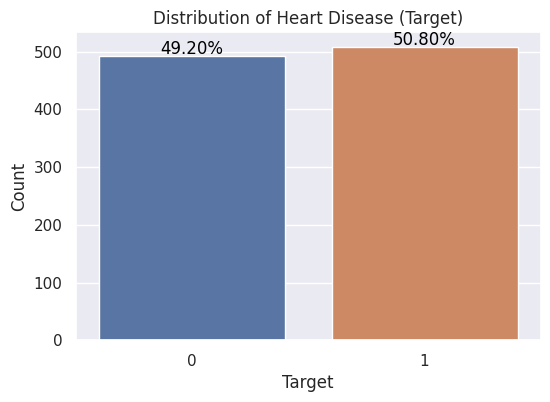

In [ ]:
# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='target', data=data)

# Customize the plot
plt.title('Distribution of Heart Disease (Target)')
plt.xlabel('Target')
plt.ylabel('Count')

# Add percentage labels on top of the bars
total = len(data['target'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,54.6070,9.037822,29.0,48.0,56.0,61.0,77.0
cholesterol,1000.0,246.9960,51.700802,126.0,211.0,240.5,277.0,564.0
resting_blood_pressure,1000.0,131.5920,17.714326,94.0,120.0,130.0,140.0,200.0
max_heart_rate_achieved,1000.0,148.9770,23.083139,71.0,132.0,152.0,165.0,202.0
st_depression,1000.0,1.0924,1.180727,0.0,0.0,0.8,1.8,6.2
num_major_vessels,1000.0,0.7010,0.944718,0.0,0.0,0.0,1.0,3.0


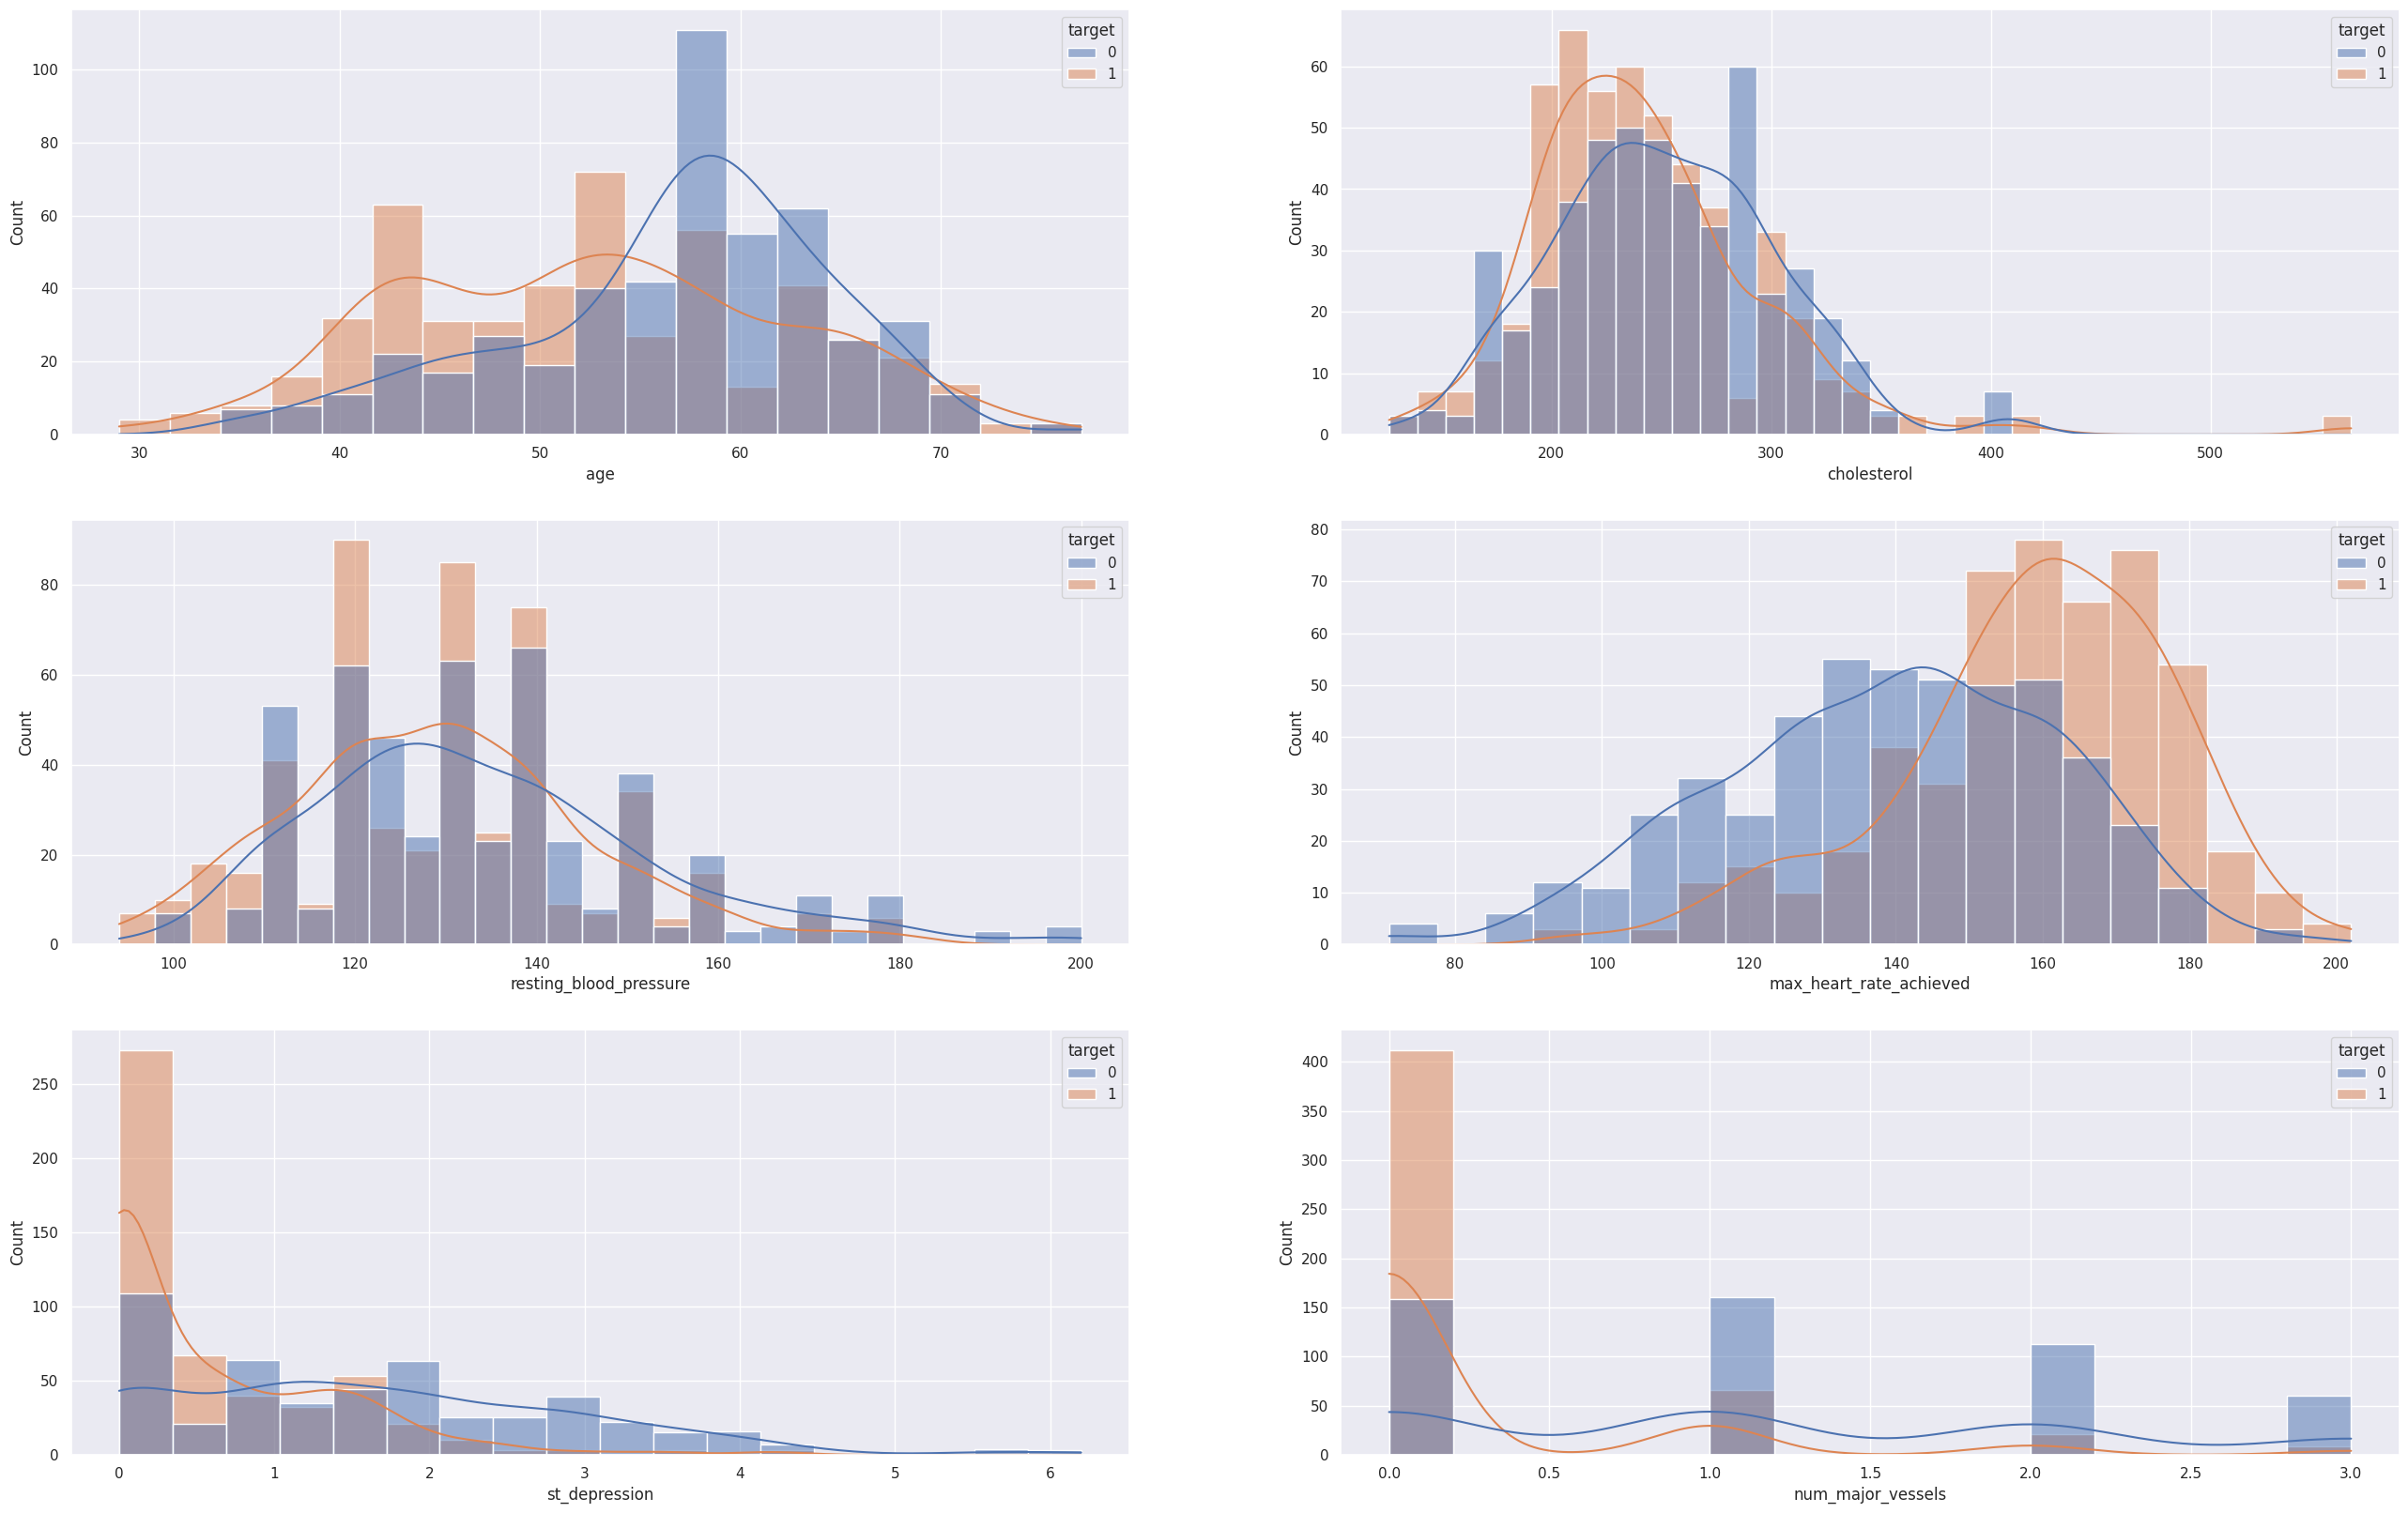

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(32, 20))

sns.histplot(data=data, x="age", kde=True,hue="target", color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="cholesterol", kde=True,hue="target", color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="resting_blood_pressure", kde=True, hue="target",color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="max_heart_rate_achieved", kde=True,hue="target", color="teal", ax=axs[1, 1])
sns.histplot(data=data, x="st_depression", kde=True,hue="target", color="teal", ax=axs[2, 0])
sns.histplot(data=data, x="num_major_vessels", kde=True, hue="target",color="teal", ax=axs[2, 1])

plt.show()

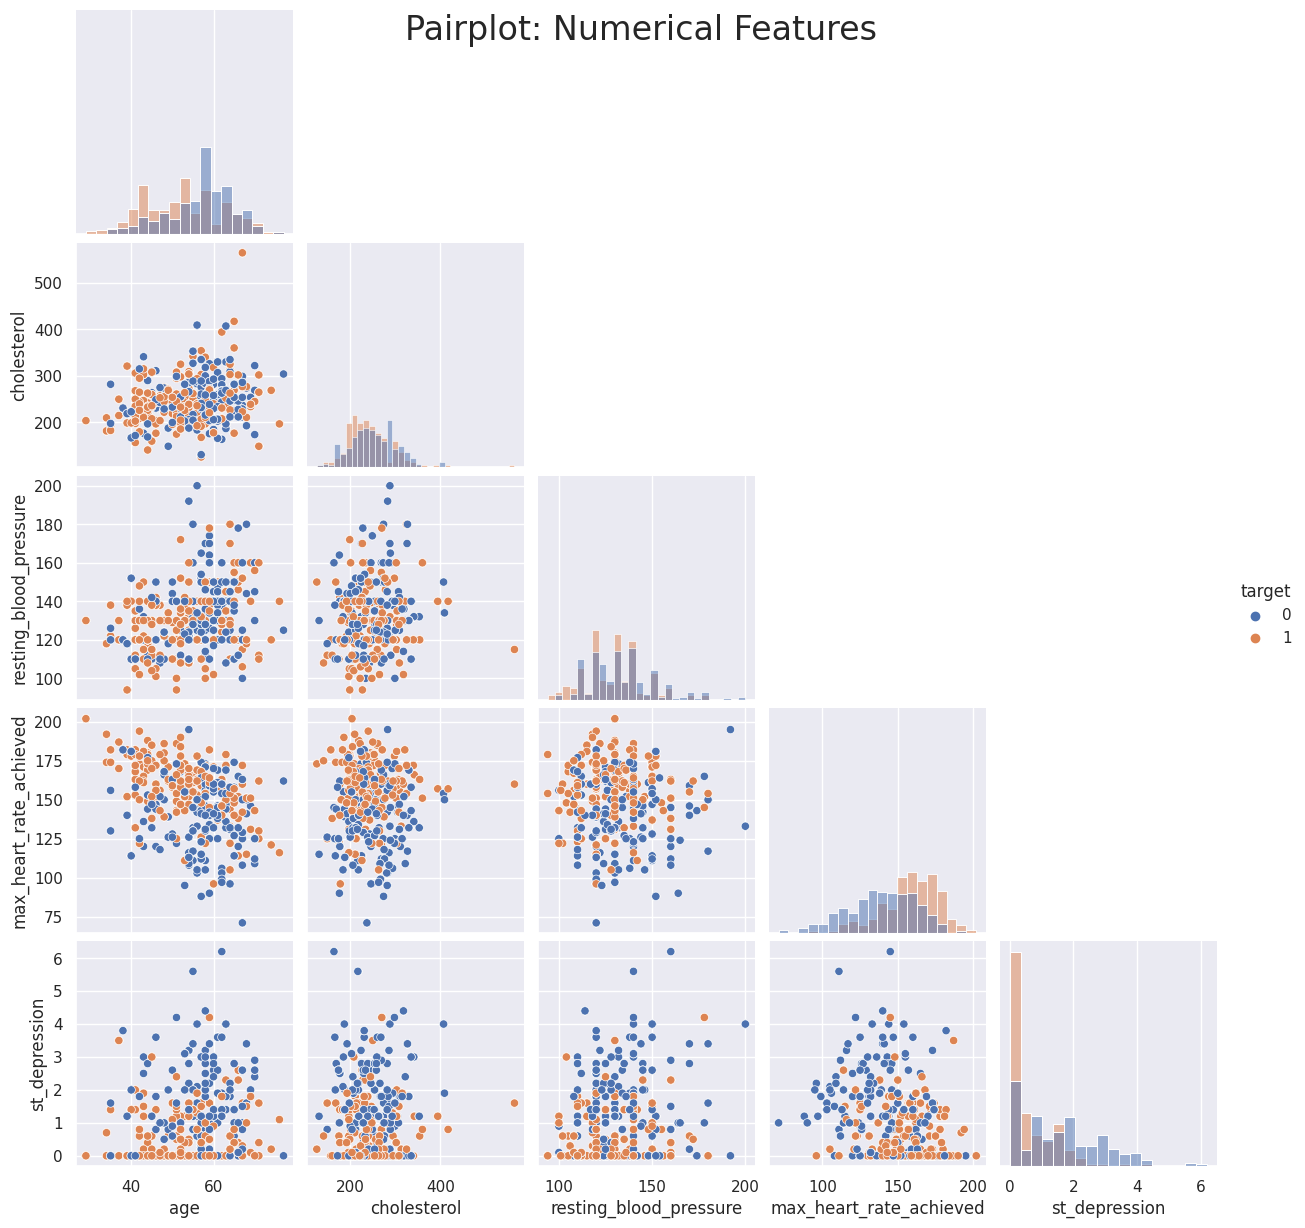

In [ ]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist');
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

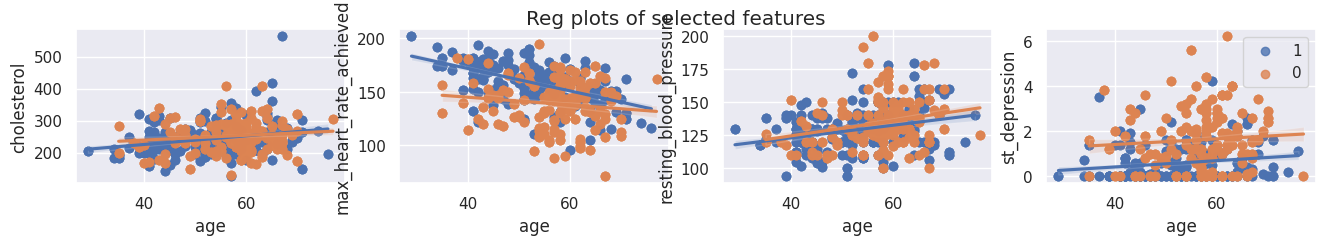

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(16, 2))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0],  label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0],  label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1],  label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1],  label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2],  label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3],  label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3],  label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

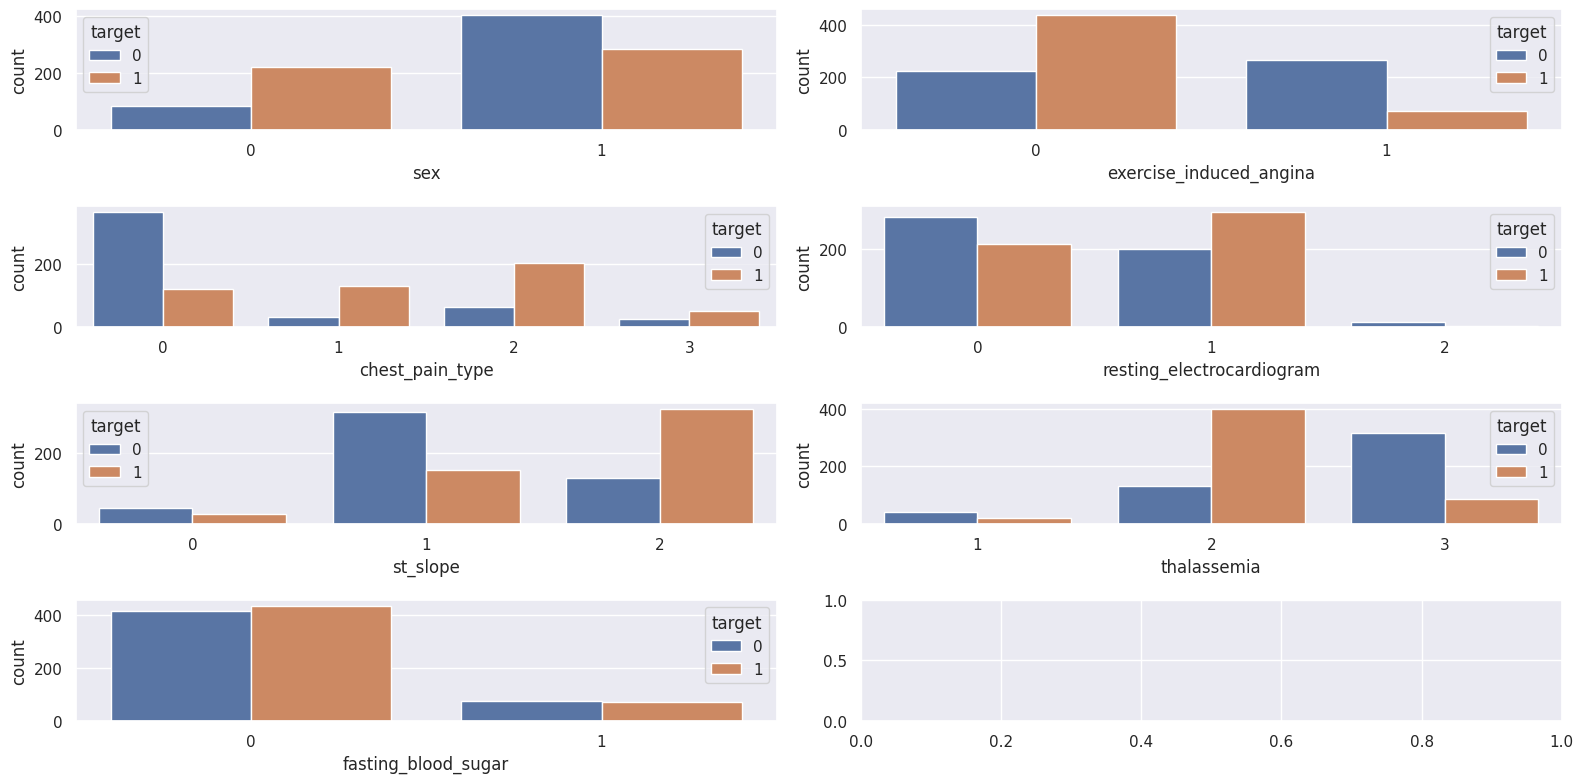

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(16, 8))

sns.countplot(x="sex", hue="target", data=data, ax=ax[0, 0])
sns.countplot(x="exercise_induced_angina", hue="target", data=data, ax=ax[0, 1])
sns.countplot(x="chest_pain_type", hue="target", data=data, ax=ax[1, 0])
sns.countplot(x="resting_electrocardiogram", hue="target", data=data, ax=ax[1, 1])
sns.countplot(x="st_slope", hue="target", data=data, ax=ax[2, 0])
sns.countplot(x="thalassemia", hue="target", data=data, ax=ax[2, 1])
sns.countplot(x="fasting_blood_sugar", hue="target", data=data, ax=ax[3, 0])

plt.tight_layout()
plt.show()






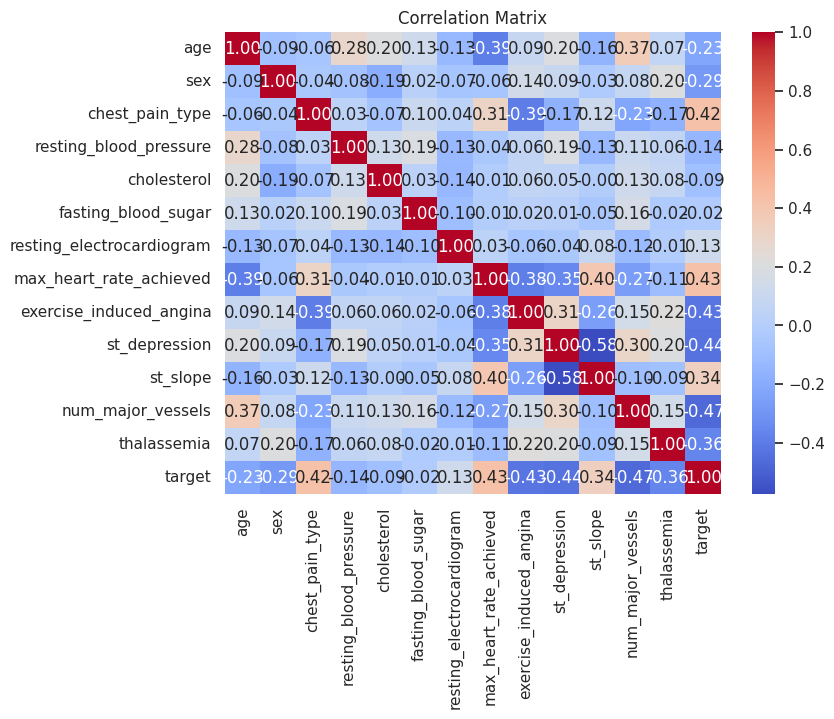

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap using Seaborn to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

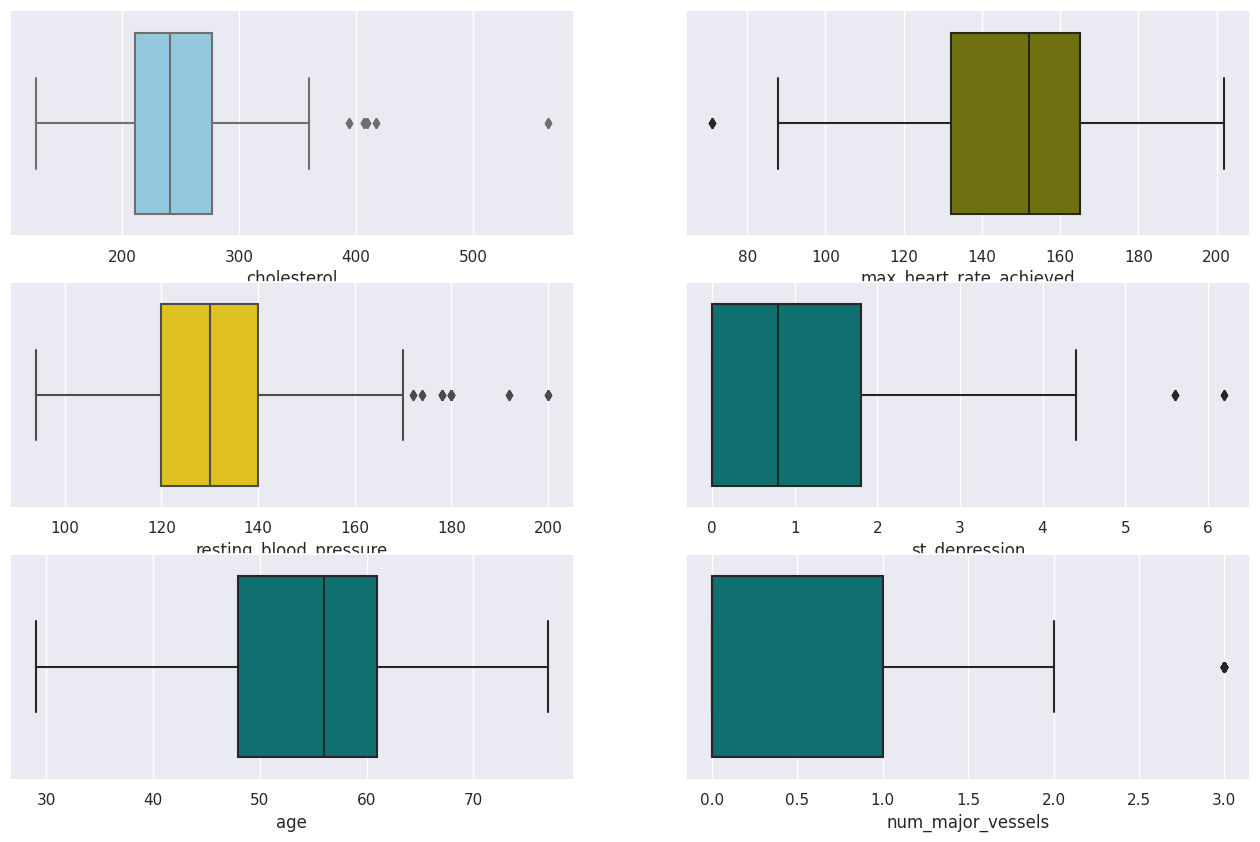

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(16, 10))

sns.boxplot(data=data, x="cholesterol", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=data, x="max_heart_rate_achieved", color="olive", ax=axs[0, 1])
sns.boxplot(data=data, x="resting_blood_pressure", color="gold", ax=axs[1, 0])
sns.boxplot(data=data, x="st_depression", color="teal", ax=axs[1, 1])
sns.boxplot(data=data, x="age", color="teal", ax=axs[2, 0])
sns.boxplot(data=data, x="num_major_vessels", color="teal", ax=axs[2, 1])

plt.show()

In [ ]:
def remove_outliers(data, columns):
    """
    Remove outliers from specified columns of the DataFrame.

    Args:
    - data (pandas DataFrame): Input DataFrame.
    - columns (list): List of column names to remove outliers from.

    Returns:
    - DataFrame with outliers removed.
    """
    # Create a copy of the input DataFrame to avoid modifying the original data
    cleaned_data = data.copy()

    # Iterate through specified columns and remove outliers
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Remove outliers
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

    return cleaned_data

# Example usage with the specified columns
data = remove_outliers(data, num_feats)
# print("DataFrame with Outliers Removed:")
data.describe()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,54.569709,0.693079,0.930792,131.641926,246.042126,0.146439,0.525577,148.943831,0.339017,1.090873,1.382146,0.703109,2.337011,0.506520
std,9.025755,0.461448,1.031738,17.717528,48.758876,0.353724,0.528882,23.109936,0.473613,1.182175,0.620437,0.945355,0.593442,0.500208
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
# Split the dataset into training and testing sets
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Fit the model on the training data
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test data
predictions = logistic_model.predict(X_test)

In [ ]:
# Evaluate the model
confusion_matrix_result = confusion_matrix(y_test, predictions)
confusion_df = pd.crosstab(index=y_test, columns=predictions, rownames=['Actual'], colnames=['Predicted'])
accuracy = accuracy_score(y_test, predictions)

# Print the confusion matrix and accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("Confusion Matrix:")
print(confusion_df)
accuracy = accuracy_score(y_test, predictions)
precision= precision_score(y_test, predictions)
f1_score= f1_score(y_test, predictions)
recall_score= recall_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision", precision)
print("F1_Score:", f1_score)
print("Recall Score:", recall_score)

Confusion Matrix:
Predicted    0    1
Actual             
0          127   25
1           14  134
Accuracy: 0.87
Precision 0.8427672955974843
F1_Score: 0.8729641693811074
Recall Score: 0.9054054054054054


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
logm=sm.Logit(y_train, X_train).fit()
print(logm.summary())

Optimization terminated successfully.
         Current function value: 0.338860
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  697
Model:                          Logit   Df Residuals:                      684
Method:                           MLE   Df Model:                           12
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.5109
Time:                        08:32:20   Log-Likelihood:                -236.19
converged:                       True   LL-Null:                       -482.92
Covariance Type:            nonrobust   LLR p-value:                 5.456e-98
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0130      0.013      0.980      0.327      -0.

In [ ]:
X_train_1 = X_train.drop(['age','cholesterol','fasting_blood_sugar'],axis=1)

In [ ]:
logm_1=sm.Logit(y_train, X_train_1).fit()
print(logm_1.summary())

Optimization terminated successfully.
         Current function value: 0.342653
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  697
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                            9
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                  0.5054
Time:                        08:32:27   Log-Likelihood:                -238.83
converged:                       True   LL-Null:                       -482.92
Covariance Type:            nonrobust   LLR p-value:                 1.956e-99
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
sex                          -1.5222      0.287     -5.308      0.000      -2.

In [ ]:
# Fit the model on the training data
logistic_model=LogisticRegression()
logistic_model.fit(X_train_1, y_train)

X_test_1 = X_test.drop(['age','cholesterol','fasting_blood_sugar'],axis=1)
predictions = logistic_model.predict(X_test_1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate the model
confusion_matrix_result = confusion_matrix(y_test, predictions)
confusion_df = pd.crosstab(index=y_test, columns=predictions, rownames=['Actual'], colnames=['Predicted'])
accuracy = accuracy_score(y_test, predictions)

# Print the confusion matrix and accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("Confusion Matrix:")
print(confusion_df)
accuracy = accuracy_score(y_test, predictions)
precision= precision_score(y_test, predictions)
f1_score= f1_score(y_test, predictions)
recall_score= recall_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision", precision)
print("F1_Score:", f1_score)
print("Recall Score:", recall_score)

Confusion Matrix:
Predicted    0    1
Actual             
0          126   26
1           16  132
Accuracy: 0.86
Precision 0.8354430379746836
F1_Score: 0.8627450980392156
Recall Score: 0.8918918918918919
